In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns

In [2]:
#input Data
df = pd.read_csv("D://portofolio/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Exploring Data
print(df.info())
df.head()
for i in df:
 print(i,'\n',df[i].unique(),'\n')
print('Before ',np.shape(df))
# Dropping duplicates from the user_dets dataset
df.drop_duplicates(inplace=True)
# Rechecking the shape of the ratings dataset after dropping duplicate records
print('After ',np.shape(df))
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age 
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

sex 
 [1 0] 

cp 
 [3 2 1 0] 

trtbps 
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

chol 
 [233 250 204 236 35

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
#X as independent variable and y as dependent variable
feature_cols = ['age', 'sex', 'cp', 'trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']
X = df[feature_cols] # Features
y = df.output # Target variable
print(X)
print(y)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [6]:
#split data 80% as training set and 20% as testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

1 0.7705
6 0.8361
11 0.8852
16 0.8525
21 0.8525
26 0.8689
31 0.8525
36 0.8689
41 0.8689
46 0.8361


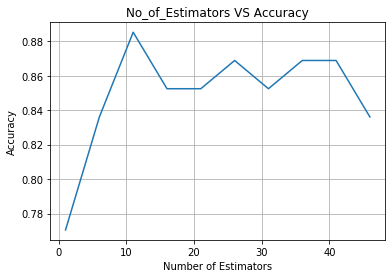

In [7]:
#Random Forest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
accuracy=[]
estimators_count=[]
for i in range(1,51,5):
 RandomForest = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
 RandomForest.fit(X_train, y_train)
 y_predicted = RandomForest.predict(X_test)
 accuracy.append(accuracy_score(y_test,y_predicted))
 estimators_count.append(i)
 print(f'{i} {accuracy_score(y_test,y_predicted).round(4)}')
 
# plot of No_of_Estimators VS Accuracy graph
plt.plot(estimators_count,accuracy)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('No_of_Estimators VS Accuracy')
plt.grid(b=None)
plt.show()


In [8]:
#Logistic Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)
model.intercept_
intercept = model.intercept_
print(intercept)
slope =model.coef_
print(slope)
model.predict_proba(X_test)

[0.22038987]
[[ 0.01896545 -1.49229578  0.70952431 -0.0139317  -0.00339116 -0.2737969
   0.12147322  0.02968416 -0.65239755 -0.50681572  0.35625074 -0.92193956
  -0.77828988]]


array([[0.92850025, 0.07149975],
       [0.22259472, 0.77740528],
       [0.72343947, 0.27656053],
       [0.92841248, 0.07158752],
       [0.92221463, 0.07778537],
       [0.9505745 , 0.0494255 ],
       [0.94130986, 0.05869014],
       [0.95838263, 0.04161737],
       [0.97589909, 0.02410091],
       [0.96547848, 0.03452152],
       [0.25951389, 0.74048611],
       [0.07294779, 0.92705221],
       [0.95169185, 0.04830815],
       [0.15406712, 0.84593288],
       [0.04863389, 0.95136611],
       [0.29446945, 0.70553055],
       [0.94311132, 0.05688868],
       [0.3058372 , 0.6941628 ],
       [0.48408216, 0.51591784],
       [0.21013875, 0.78986125],
       [0.20278512, 0.79721488],
       [0.61959893, 0.38040107],
       [0.91780399, 0.08219601],
       [0.70061986, 0.29938014],
       [0.15383123, 0.84616877],
       [0.99510984, 0.00489016],
       [0.97394364, 0.02605636],
       [0.64177427, 0.35822573],
       [0.04134432, 0.95865568],
       [0.37391677, 0.62608323],
       [0.

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



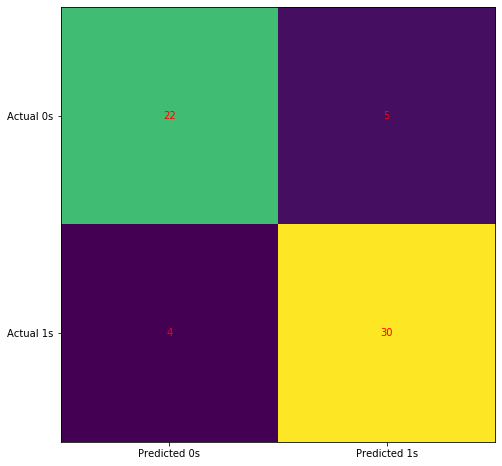

In [9]:
model.score(X_train,y_train)
confusion_matrix(y_test, model.predict(X_test))
cm = confusion_matrix(y_test, model.predict(X_test))
print(classification_report(y_test, model.predict(X_test)))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [10]:
accuracy = model.score(X_train,y_train)
print(accuracy)

0.8423236514522822


In [16]:
#Using Decision Tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
print(clf)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1]
Accuracy: 0.7868852459016393


              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



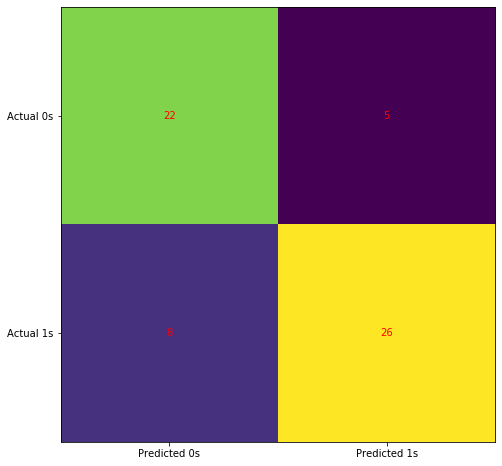

In [17]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()